In [1]:
# %%capture
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install umap-learn
# !pip install hdbscan
# !pip install biopython


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/02_all_signal_peptides/biochemical_results_synthetic_signalpeptides.csv', index_col=False)

In [4]:
df.head()


,SP_ID,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7
0,SP_997,1.0,-1.3,0.200809,14.0,1.993333,-0.147963,4.0,-0.760000,-0.533796
1,SP_944,1.0,-1.0,0.196884,14.0,3.420000,-0.557223,5.0,0.766667,-0.823772
2,SP_948,1.0,-1.0,0.196884,12.0,2.623077,-0.590986,3.0,0.500000,-0.823772
3,SP_993,1.0,-1.0,0.196884,14.0,3.166667,-0.505667,5.0,0.083333,-0.590986
4,SP_204,1.0,-1.3,0.200809,15.0,2.156250,-0.590986,6.0,-0.171429,-0.823772


# UMAP calculation

In [5]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import hdbscan
import seaborn as sns
import matplotlib.colors as mcolors


# Prepare the DataFrame by dropping non-numeric columns
data_for_umap = df.drop(columns=['SP_ID', ])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_umap)

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=1234)
umap_results = umap_model.fit_transform(scaled_data)

/Users/lucaslevassor/opt/anaconda3/envs/py_3_10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lucaslevassor/opt/anaconda3/envs/py_3_10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## UMAP clustering with hdbscan

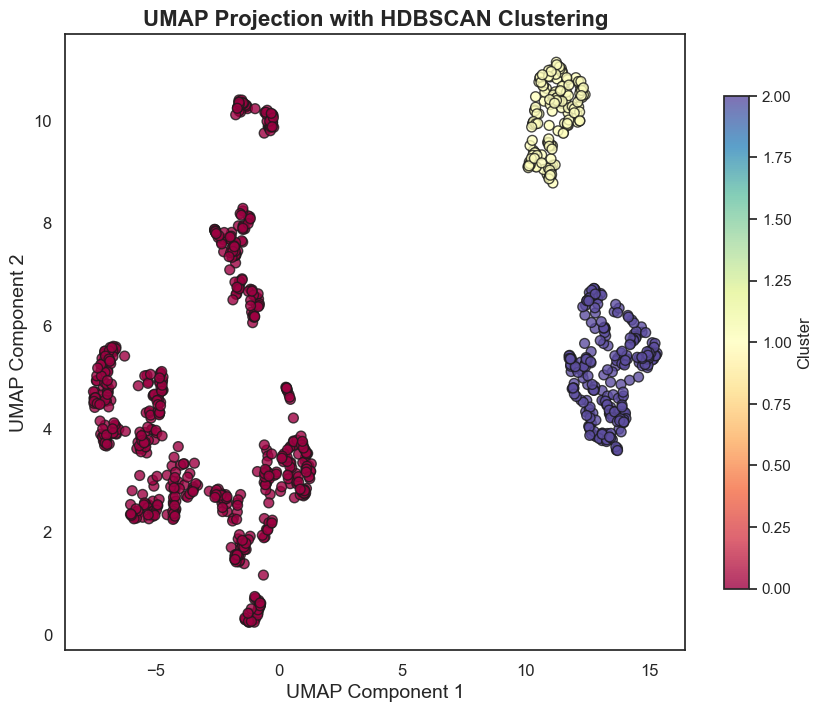

In [6]:
# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')


# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(umap_results)

# Generating a custom discrete colormap
cmap = plt.cm.Spectral
norm = mcolors.Normalize(vmin=cluster_labels.min(), vmax=cluster_labels.max())

# Visualize the results with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=cluster_labels, cmap=cmap, norm=norm, s=50, alpha=0.8, edgecolor='k')

# Adding a color bar
plt.colorbar(scatter, label='Cluster', shrink=0.8)

# Enhancing plot aesthetics
plt.title('UMAP Projection with HDBSCAN Clustering', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../data/plots/UMAP_hdbscan_clustering_syn_sps.png', dpi=300, bbox_inches='tight')


plt.show()


## UMAP with K-means

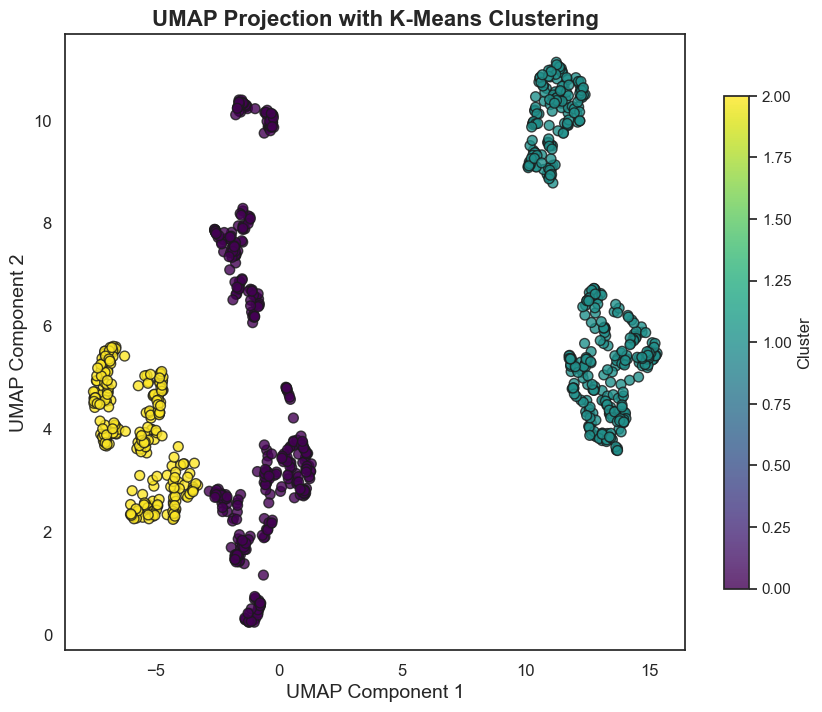

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

NUMBER_OF_CLUSTERS = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, random_state=1234)  # Adjust the number of clusters as needed
kmeans_clusters = kmeans.fit_predict(umap_results)

# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')

# Create a color palette
palette = sns.color_palette("bright", NUMBER_OF_CLUSTERS)  # Adjust the number of colors based on clusters

# Visualize the results with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=kmeans_clusters, cmap='viridis', s=50, alpha=0.8, edgecolor='k')

# Adding a color bar
plt.colorbar(scatter, label='Cluster', shrink=0.8)

# Enhancing plot aesthetics
plt.title('UMAP Projection with K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../data/plots/UMAP_kmeans_clustering_syn_sps.png', dpi=300, bbox_inches='tight')


plt.show()


In [8]:
# Add the cluster assignments to your original DataFrame
df['umap_cluster'] = kmeans_clusters

# Now you can see each row with its corresponding cluster
df.head()


,SP_ID,n_relative_length,n_kd_hydrophobicity,n_charge_at_ph7,h_relative_length,h_kd_hydrophobicity,h_charge_at_ph7,c_relative_length,c_kd_hydrophobicity,c_charge_at_ph7,umap_cluster
0,SP_997,1.0,-1.3,0.200809,14.0,1.993333,-0.147963,4.0,-0.760000,-0.533796,1
1,SP_944,1.0,-1.0,0.196884,14.0,3.420000,-0.557223,5.0,0.766667,-0.823772,1
2,SP_948,1.0,-1.0,0.196884,12.0,2.623077,-0.590986,3.0,0.500000,-0.823772,1
3,SP_993,1.0,-1.0,0.196884,14.0,3.166667,-0.505667,5.0,0.083333,-0.590986,1
4,SP_204,1.0,-1.3,0.200809,15.0,2.156250,-0.590986,6.0,-0.171429,-0.823772,1


In [9]:

# If you want to see rows belonging to a specific cluster, you can filter the DataFrame
cluster_number = 0  # Change this to the cluster number you're interested in
specific_cluster_df = df[df['umap_cluster'] == cluster_number]
#specific_cluster_df.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data1.csv')

In [10]:
cluster_number = 1  # Change this to the cluster number you're interested in
specific_cluster_df1 = df[df['umap_cluster'] == cluster_number]
#specific_cluster_df1.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data2')

In [11]:
cluster_number = 2  # Change this to the cluster number you're interested in
specific_cluster_df2 = df[df['umap_cluster'] == cluster_number]
#specific_cluster_df2.to_csv('../data/02_all_signal_peptides/groups_of_sps/group_data3')

## PCA and t-SNE

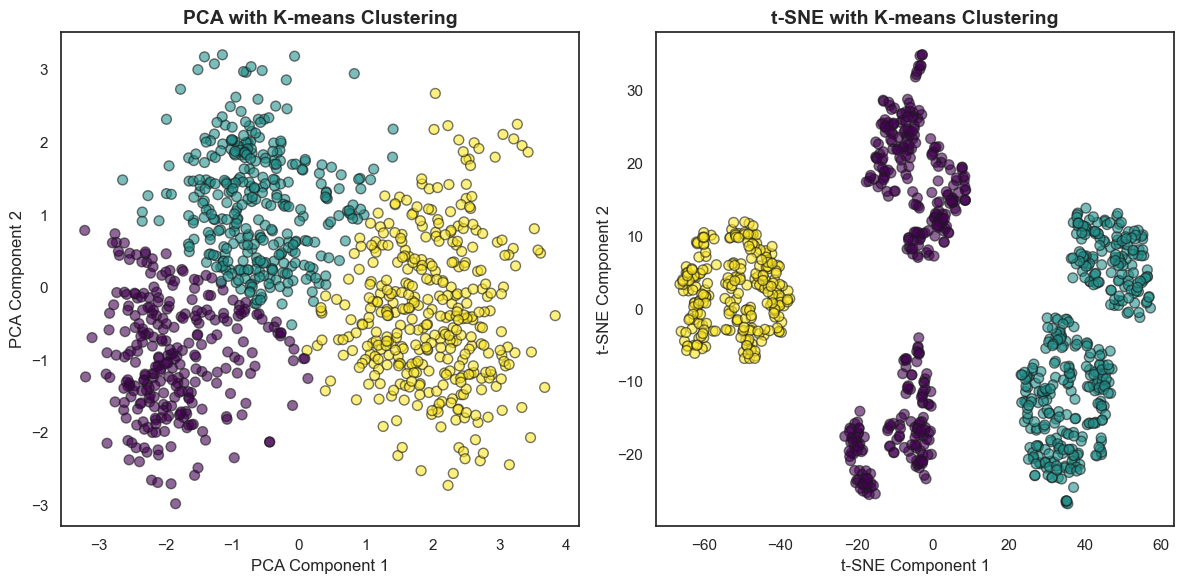

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Prepare the DataFrame by dropping the non-numeric column
data_for_analysis = df.drop(columns=['SP_ID'])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_analysis)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=1234)
tsne_results = tsne.fit_transform(scaled_data)

# Apply K-means clustering
n_clusters = 3  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
pca_clusters = kmeans.fit_predict(pca_results)
tsne_clusters = kmeans.fit_predict(tsne_results)

# Set style for plots
sns.set(style='white', context='notebook')

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=pca_clusters, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('PCA with K-means Clustering', fontsize=14, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=tsne_clusters, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('t-SNE with K-means Clustering', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure (optional)
plt.savefig('../data/plots/PCA_tSNE_Clustering.png', dpi=300, bbox_inches='tight')

plt.show()


## Comparing clusters

In [14]:
# Add the t-SNE clusters to your DataFrame
df['tsne_cluster'] = tsne_clusters

In [15]:
crosstab = pd.crosstab(df['tsne_cluster'], df['umap_cluster'])
crosstab

umap_cluster,0,1,2
tsne_cluster,,,
0,365,0,0
1,0,389,0
2,0,0,245


## Adjusted Rand Index (ARI) or Normalized Mutual Information (NMI)

In [16]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(df['tsne_cluster'], df['umap_cluster'])

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(df['tsne_cluster'], df['umap_cluster'])

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")


Adjusted Rand Index: 1.000
Normalized Mutual Information: 1.000


## Filtering out gene ids


### Understanding ARI and NMI:

- **Adjusted Rand Index (ARI)**: Measures the similarity of the two assignments, ignoring permutations and with chance normalization. An ARI score of 1 means perfect labeling alignment, while 0 or negative values indicate no better than random chance.

- **Normalized Mutual Information (NMI)**: Also measures the similarity, but it's normalized to account for chance. Like ARI, a score of 1 indicates perfect agreement, and lower values indicate less agreement.


## Plottting with natural SPs


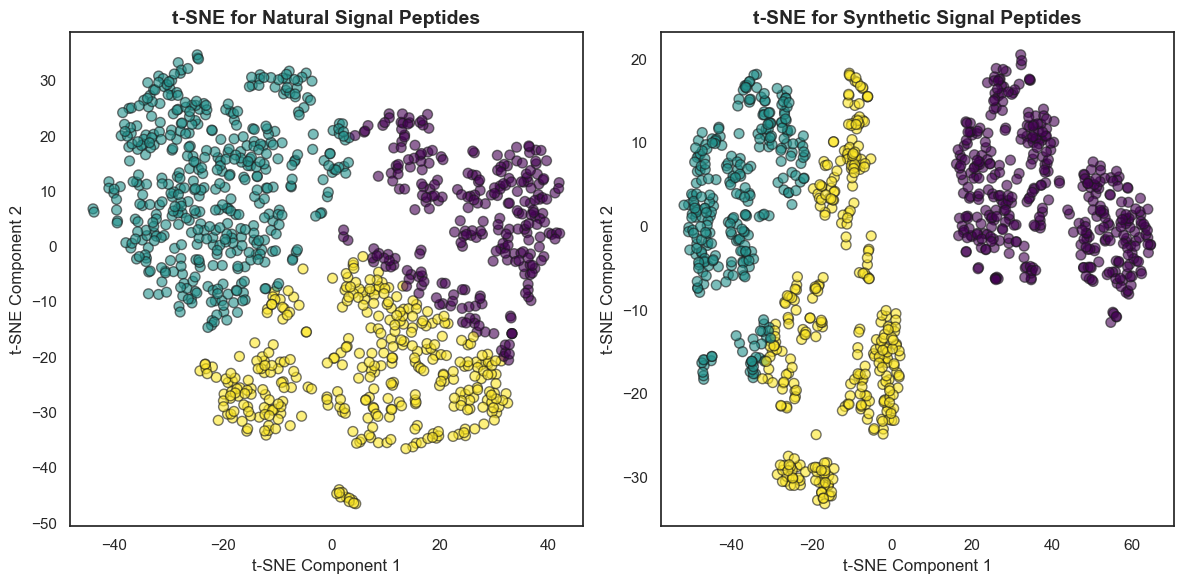

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load the natural and synthetic sps dataframes
natural_sps_df = pd.read_csv('../data/02_all_signal_peptides/biochemical_result_w_abundance.csv', index_col=False)
natural_sps_for_analysis = natural_sps_df.drop(columns=['gene', 'abundance'])

synthetic_sps_df = pd.read_csv('../data/02_all_signal_peptides/biochemical_results_synthetic_signalpeptides.csv', index_col=False)
synthetic_sps_for_analysis = synthetic_sps_df.drop(columns=['SP_ID'])

# Standardize the features
scaler = StandardScaler()
scaled_data_natural = scaler.fit_transform(natural_sps_for_analysis)
scaled_data_synthetic = scaler.fit_transform(synthetic_sps_for_analysis)

# Apply t-SNE for natural sps
tsne_natural = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=1234)
tsne_results_natural = tsne_natural.fit_transform(scaled_data_natural)

# Apply t-SNE for synthetic sps
tsne_synthetic = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=1234)
tsne_results_synthetic = tsne_synthetic.fit_transform(scaled_data_synthetic)

# Apply K-means clustering
n_clusters = 3  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=123)

tsne_clusters_natural = kmeans.fit_predict(tsne_results_natural)
tsne_clusters_synthetic = kmeans.fit_predict(tsne_results_synthetic)

# Set style for plots
sns.set(style='white', context='notebook')

# Plot t-SNE results for natural sps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(tsne_results_natural[:, 0], tsne_results_natural[:, 1], c=tsne_clusters_natural, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('t-SNE for Natural Signal Peptides', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Plot t-SNE results for synthetic sps
plt.subplot(1, 2, 2)
plt.scatter(tsne_results_synthetic[:, 0], tsne_results_synthetic[:, 1], c=tsne_clusters_synthetic, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
plt.title('t-SNE for Synthetic Signal Peptides', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure (optional)
plt.savefig('../data/plots/natural_vs_synhtetic_tSNE_Clustering.png', dpi=300, bbox_inches='tight')

plt.show()


# Looking at the 3 groupings of Signal peptides through DEEPloc

In [29]:
# Sample DataFrame loading (replace with actual DataFrame loading as needed)
df1_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_646764CA00004786815A8068.csv')
df2_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_6467637F0000328EBD10D7B6.csv')
df3_deeploc = pd.read_csv('../data/03_proteomics_data/deeploc_predictions/all_sps/results_6467641D00003C072DBA1C82.csv')
df_deeploc_data = pd.concat([df1_deeploc, df2_deeploc, df3_deeploc])
df_deeploc_data = df_deeploc_data.rename(columns ={'Protein_ID':'gene'})
df_deeploc_data

,gene,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,AO090010000644-T-p1,Extracellular,Signal peptide,0.1605,0.0519,0.9023,0.0443,0.0708,0.0055,0.1702,0.2297,0.1663,0.0011
1,AO090010000654-T-p1,Extracellular,NaN,0.1198,0.0709,0.8547,0.4497,0.0273,0.0097,0.2952,0.2893,0.2882,0.0128
2,AO090010000656-T-p1,Endoplasmic reticulum,Signal peptide,0.2038,0.0767,0.5792,0.0826,0.1869,0.0009,0.6805,0.3273,0.3636,0.0029
3,AO090010000666-T-p1,Extracellular,NaN,0.1090,0.1130,0.7348,0.2847,0.0685,0.0040,0.1425,0.2120,0.1515,0.0225
4,AO090010000684-T-p1,Extracellular,Signal peptide,0.2060,0.0804,0.8861,0.1915,0.1673,0.0193,0.1793,0.1506,0.0989,0.0019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AO090010000615-T-p1,Golgi apparatus,Signal peptide|Transmembrane domain,0.1426,0.0720,0.5891,0.0775,0.1246,0.0112,0.5028,0.3460,0.9420,0.0082
496,AO090010000619-T-p1,Extracellular,Signal peptide,0.2045,0.0564,0.9545,0.1254,0.0365,0.0091,0.2726,0.3093,0.2011,0.0031
497,AO090010000622-T-p1,Cell membrane,Signal peptide,0.1687,0.0605,0.5742,0.6268,0.0458,0.0067,0.3746,0.4468,0.3464,0.0141
498,AO090010000631-T-p1,Extracellular,Signal peptide,0.1509,0.0239,0.8992,0.0856,0.0928,0.0319,0.1862,0.2210,0.1559,0.0015


In [34]:
cluster1 = specific_cluster_df.merge(df_deeploc_data,on='gene')
cluster2 = specific_cluster_df1.merge(df_deeploc_data,on='gene')
cluster3 = specific_cluster_df2.merge(df_deeploc_data,on='gene')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get localization counts
def get_localization_counts(df):
    return df['Localizations'].value_counts()

# Get counts for each cluster
counts1 = get_localization_counts(cluster1)
counts2 = get_localization_counts(cluster2)
counts3 = get_localization_counts(cluster3)

# Set the aesthetics for the plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Create subplots with larger figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8), sharey=True)

# Define a color palette with enough colors
max_unique_values = max(counts1.size, counts2.size, counts3.size)
palette = sns.color_palette("husl", max_unique_values)

# Function to create a barplot for a cluster
def create_barplot(ax, counts, title):
    sns.barplot(ax=ax, x=counts.index, y=counts.values, palette=palette[:counts.size])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Localizations', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=90)  # Rotate labels

# Create bar plots for each cluster
create_barplot(axes[0], counts1, 'Cluster 1 Localizations')
create_barplot(axes[1], counts2, 'Cluster 2 Localizations')
create_barplot(axes[2], counts3, 'Cluster 3 Localizations')

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  # Adjust horizontal spacing
plt.show()


: 

In [ ]:
cluster1

: 

## Gene ontology of different groups of SPs

In [ ]:
cluster1 = list(specific_cluster_df['gene'])
cluster2 = list(specific_cluster_df1['gene'])
cluster3 = list(specific_cluster_df2['gene'])

: 

These cluster were sent to FUNGIDB and go annotation was made:

In [ ]:
# Sample DataFrame loading (replace with actual DataFrame loading as needed)
df1 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group1.tsv', sep='\t')
df2 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group2.tsv', sep='\t')
df3 = pd.read_csv('../data/14_GO_analysis/hiddenGoEnrichmentResult_group3.tsv', sep='\t')
df1

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df1, df2, df3 are your dataframes

def plot_top_bgd_genes(df, title, top_n=10):
    # Sort the dataframe by 'Result count' and select top N
    df_sorted = df.sort_values(by='Result count', ascending=False).head(top_n)

    # Setting the aesthetic style for the plots
    sns.set(style='whitegrid', context='talk', palette='viridis')

    # Plotting
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Result count', y='Name', data=df_sorted, edgecolor='black')
    plt.title(f'Top {top_n} Used Genes in Background for {title}', fontsize=16, fontweight='bold')
    plt.xlabel('Background Gene Count', fontsize=14)
    plt.ylabel('GO Term', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()  # Removes top and right spines for a cleaner plot

    # Save the figure (optional)
    plt.savefig(f'../data/plots/{title}_Top_Background_Genes.png', dpi=300, bbox_inches='tight')

    plt.show()

# Plotting for each DataFrame
plot_top_bgd_genes(df1, 'Group1')
plot_top_bgd_genes(df2, 'Group2')
plot_top_bgd_genes(df3, 'Group3')


: 

In [ ]:
# Molecular functions for the grouping of signal peptides
df1 = pd.read_csv('../data/14_GO_analysis/group1_mol_function_GO.tsv', sep='\t')
df2 = pd.read_csv('../data/14_GO_analysis/group2_mol_function_GO.tsv', sep='\t')
df3 = pd.read_csv('../data/14_GO_analysis/group3_mol_function_GO.tsv', sep='\t')


: 

In [ ]:
# Plotting for each DataFrame
plot_top_bgd_genes(df1, 'Group1 - molecular functions')
plot_top_bgd_genes(df2, 'Group2 - molecular functions')
plot_top_bgd_genes(df3, 'Group3 - molecular functions')

: 

In [ ]:
synthetic_sps = pd.read_csv('data/15_SecretoGen/Best_signal_peptides_for_A_oryzae_RFP_his_tag_sorted.csv')

: 